### IDs:
Insert yours IDs to the cell below

 **ID #1: 311149082**

**ID #2: 000803254**


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [ ]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,5.0) # set default size of plots

### **Question 1 - Defective products**

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

We begin by defining the random variable $X$.<br> <br> 
$X$ ~ $Binom(n, p)$ where $p=0.03$. This means that $X$ is the number of successes (how many defective product) given n attempts.
<br>
In general,
$$P(X \ge k)=1-P(X<k)=1-P(X \leq k-1) = p_{goal}$$
We want to find a value for $n$ such that we have that: $$P(X\ge1) = 0.85$$

In [ ]:
# This function runs many simulations until we find the right n-value
# Input: p, k and threshold.
# Output: n and all the calculated probabilities 
def find_n(prob_defective, threshold, k_defective):
  res = []
  for n in range(0, 1000):
    distrabution = 1 - stats.binom.cdf(k=k_defective-1, n=n, p=prob_defective)
    res.append(distrabution)
    if np.isclose(distrabution, threshold, rtol=.005):
      return n, res
  

In [ ]:
# This function plots the probabilities calculated in the find_n function
# Input: probability_array, k and threshold.
def plot_probs(results, threshold, k_defective):
  plt.plot(np.arange(0, len(results)),results,  color='b', label="Probabilities")
  plt.axhline( y=threshold,color='r',linestyle="dashed", alpha = 0.5)
  plt.axvline( x=len(results)-1,color='b',linestyle="dashed", alpha = 0.5)
  plt.ylim([0,1.0])
  plt.xlabel("Number of products")
  plt.ylabel(("Probability of " + str(k_defective) + " defective products"))
  plt.legend()
  plt.show()

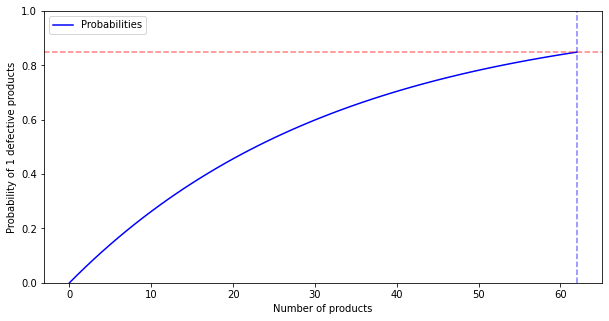


We found that the value for n is: 62


In [ ]:
prob_defective, threshold, k_defective = 0.03,0.85,1
n_val, res = find_n(prob_defective, threshold, k_defective)
plot_probs(res,threshold, k_defective)
print("\nWe found that the value for n is:", n_val)

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

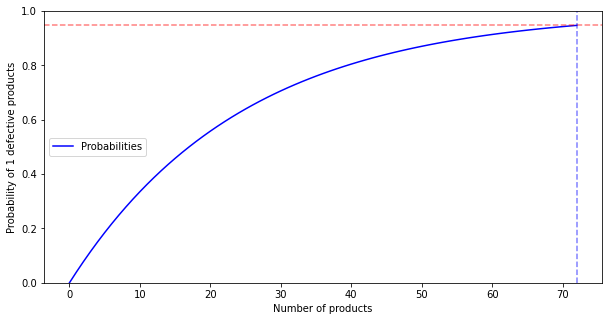


We found that the value for n is: 72


In [ ]:
prob_defective, threshold, k_defective = 0.04,0.95,1
n_val, res = find_n(prob_defective, threshold, k_defective)
plot_probs(res,threshold, k_defective)
print("\nWe found that the value for n is:", n_val)

#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

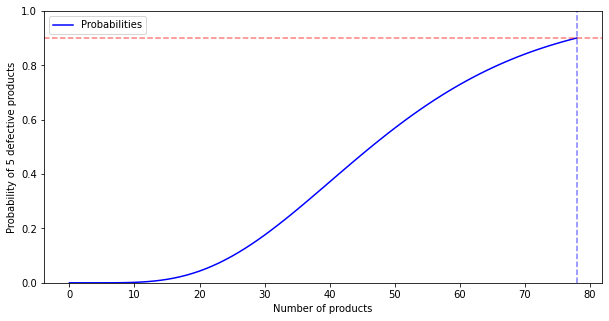


We found that the value for n is: 78


In [ ]:
prob_defective, threshold, k_defective = 0.10,0.9,5
n_val, res = find_n(prob_defective, threshold, k_defective)
plot_probs(res,threshold, k_defective)
print("\nWe found that the value for n is:", n_val)

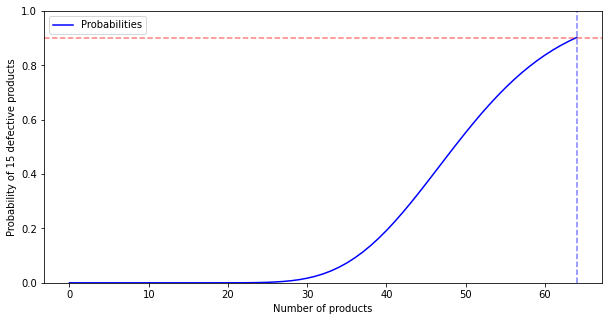


We found that the value for n is: 64


In [ ]:
prob_defective, threshold, k_defective = 0.30,0.9,15
n_val, res = find_n(prob_defective, threshold, k_defective)
plot_probs(res,threshold, k_defective)
print("\nWe found that the value for n is:", n_val)

From the first example we get: $$ 1-P(X\leq l-1) =1-\sum_{k=1}^{l-1}\binom{n}{k} p^k(1-p)^{n-k}=1-\sum_{k=1}^{4}\binom{n}{k} 0.1^k(0.9)^{n-k}=0.9 $$
$$\sum_{k=1}^{4}\binom{n}{k} 0.1^k(0.9)^{n-k}=0.1$$
 
From the second example we get:
$$1-P(X\leq l-1) =1-\sum_{k=1}^{l-1}\binom{n}{k} p^k(1-p)^{n-k}=1-\sum_{k=1}^{14}\binom{n}{k} 0.3^k(0.7)^{n-k}=0.9$$

$$\sum_{k=1}^{14}\binom{n}{k} 0.3^k(0.7)^{n-k}=0.1 $$

We can see from the results we expect to see a smaller value for $n$ than for the first one since, the change in the probabilty value $p$ has a great influence in the factor of the $k$ value (goal number) of defective products. <br>Since we have that the second example is 3 times the size of the first example then, when we enlarge $p$ by 3 there would be much less samples required in order to find the amount of defective products.

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

### Question 3 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


#### 4.C
Assume that the price of a stock changes in any given day according to (in NIS):

$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.3 & 0.15 & 0.15 & 0.15 & 0.25
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

2. What is the probability that the stock has gained strictly more than 7NIS after 5 days? Has lost strictly more than 4NIS? Explain your answers.